<a href="https://colab.research.google.com/github/cabbi120101/final_multi/blob/main/Try/%EC%A7%84%EC%A7%9C%EC%B5%9C%EC%A2%85%EC%9E%90%EC%97%B0%EC%96%B4_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd

import numpy as np
import json

from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [ ]:
champ_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/3주차/시도/champ_addSk.csv")
champ_info.head()

,Unnamed: 0,version,id,key,name,title,blurb,info,image,tags,partype,stats,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,skins,lore,allytips,enemytips,spells,passive,recommended,skillQ,skillW,skillE,skillR
0,0,11.17.1,Aatrox,266,Aatrox,the Darkin Blade,Once honored defenders of Shurima against the ...,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","['Fighter', 'Tank']",Blood Well,"{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl...",8,4,3,4,580.0,90,0.0,0.0,345,38,3.25,32.0,1.25,175,3.00,1.00,0.000,0.0,0,0,60.0,5.00,2.500,0.651,"[{'id': '266000', 'num': 0, 'name': 'default',...",Once honored defenders of Shurima against the ...,['Use Umbral Dash while casting The Darkin Bla...,"[""Aatrox's attacks are very telegraphed, so us...","[{'id': 'AatroxQ', 'name': 'The Darkin Blade',...","{'name': 'Deathbringer Stance', 'description':...",[],"{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc..."
1,1,11.17.1,Ahri,103,Ahri,the Nine-Tailed Fox,Innately connected to the latent power of Rune...,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","['Mage', 'Assassin']",Mana,"{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...",3,4,8,5,526.0,92,418.0,25.0,330,21,3.50,30.0,0.50,550,5.50,0.60,8.000,0.8,0,0,53.0,3.00,2.000,0.668,"[{'id': '103000', 'num': 0, 'name': 'default',...",Innately connected to the latent power of Rune...,"['Use Charm to set up your combos, it will mak...","[""Ahri's survivability is dramatically reduced...","[{'id': 'AhriOrbofDeception', 'name': 'Orb of ...","{'name': 'Essence Theft', 'description': 'When...",[],"{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd..."
2,2,11.17.1,Akali,84,Akali,the Rogue Assassin,Abandoning the Kinkou Order and her title of t...,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'full': 'Akali.png', 'sprite': 'champion0.png...",['Assassin'],Energy,"{'hp': 500, 'hpperlevel': 105, 'mp': 200, 'mpp...",5,3,8,7,500.0,105,200.0,0.0,345,23,3.50,37.0,1.25,125,8.00,0.50,50.000,0.0,0,0,62.0,3.30,3.200,0.625,"[{'id': '84000', 'num': 0, 'name': 'default', ...",Abandoning the Kinkou Order and her title of t...,['Akali excels at killing fragile champions. L...,['Akali can still be hit by area effect spells...,"[{'id': 'AkaliQ', 'name': 'Five Point Strike',...","{'name': ""Assassin's Mark"", 'description': ""De...",[],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ..."
3,3,11.17.1,Akshan,166,Akshan,the Rogue Sentinel,"Raising an eyebrow in the face of danger, Aksh...","{'attack': 0, 'defense': 0, 'magic': 0, 'diffi...","{'full': 'Akshan.png', 'sprite': 'champion0.pn...","['Marksman', 'Assassin']",Mana,"{'hp': 560, 'hpperlevel': 90, 'mp': 350, 'mppe...",0,0,0,0,560.0,90,350.0,40.0,330,26,3.00,30.0,0.50,500,3.75,0.65,8.175,0.7,0,0,52.0,3.50,4.000,0.638,"[{'id': '166000', 'num': 0, 'name': 'default',...","Raising an eyebrow in the face of danger, Aksh...","[""Raising an eyebrow in the face of danger, Ak...",[],"[{'id': 'AkshanQ', 'name': 'Avengerang', 'desc...","{'name': 'Dirty Fighting', 'description': ""Eve...",[],"{'id': 'AkshanQ', 'name': 'Avengerang', 'descr...","{'id': 'AkshanW', 'name': 'Going Rogue', 'desc...","{'id': 'AkshanE', 'name': 'Heroic Swing', 'des...","{'id': 'AkshanR', 'name': 'Comeuppance', 'desc..."
4,4,11.17.1,Al

In [ ]:
from ast import literal_eval

champ_info['skillQ'] = champ_info['skillQ'].apply(literal_eval)
champ_info['skillW'] = champ_info['skillW'].apply(literal_eval)
champ_info['skillE'] = champ_info['skillE'].apply(literal_eval)
champ_info['skillR'] = champ_info['skillR'].apply(literal_eval)

In [ ]:
champ_info['skillE'][0]['tooltip']

'Passive: Aatrox gains {{ espellvamp }}% Omnivamp against champions, increased to {{ espellvampempowered }}% Omnivamp during World Ender.Active: Aatrox dashes. He can use this Ability while winding up his other Abilities.'

In [ ]:
champ_info['passive'][155]

"{'name': 'Garden of Thorns', 'description': 'Seeds spawn around Zyra periodically, becoming faster with level. Zyra can cast Deadly Spines or Grasping Roots near seeds to grow plants, who fight for Zyra.', 'image': {'full': 'ZyraP.png', 'sprite': 'passive5.png', 'group': 'passive', 'x': 240, 'y': 0, 'w': 48, 'h': 48}}"

In [ ]:
champ_info['passive'][0].replace('\'','').lower().split()

['{name:',
 'deathbringer',
 'stance,',
 'description:',
 '"periodically,',
 'aatroxs',
 'next',
 'basic',
 'attack',
 'deals',
 'bonus',
 'physical',
 'damage',
 'and',
 'heals',
 'him,',
 'based',
 'on',
 'the',
 'targets',
 'max',
 'health.',
 '",',
 'image:',
 '{full:',
 'aatrox_passive.png,',
 'sprite:',
 'passive0.png,',
 'group:',
 'passive,',
 'x:',
 '0,',
 'y:',
 '0,',
 'w:',
 '48,',
 'h:',
 '48}}']

In [ ]:
    champ_pas = champ_info['passive'][0].replace('\'','')
    # 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
    champ_pas = re.sub("[^a-zA-Z]"," ", champ_pas)
    
    # 대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나누어 리스트화
    k = champ_pas.lower().split()

In [ ]:
len(k)

36

In [ ]:
k[2:3]

['stance']

In [ ]:
champ_summ = champ_info[['id','key','tags']]

In [ ]:
passive = []
for i in range(len(champ_summ)):
    champ_pas = champ_info['passive'][i].replace('\'','')
    # 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
    champ_pas = re.sub("[^a-zA-Z]"," ", champ_pas)
    
    # 대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나누어 리스트화
    k = champ_pas.lower().split()

    for j in range(len(k)):
        if k[j] == 'description':
            start = j +1
        if k[j] == 'image':
            end = j
     
    real_passive = ' '.join(k[start : end])
    passive.append(real_passive)

In [ ]:
champ_summ['passive'] = passive

In [ ]:
passive[0]

'periodically aatroxs next basic attack deals bonus physical damage and heals him based on the targets max health'

In [ ]:
champ_info['skillQ'][36]['tooltip']

'Gragas rolls a cask that explodes after {{ e4 }} seconds, dealing between {{ mindamage }} magic damage and {{ maxdamage }} magic damage and Slowing for between {{ e2 }} and {{ effect2amount*1.5 }}% for {{ e3 }} seconds. The damage and Slow increase with time the cask spent before exploding. Gragas can Recast to detonate the cask early.'

In [ ]:
def only_description(column):
    champ_q = []
    for i in range(len(champ_info)):
        champ_q.append(champ_info[column][i]['description'])
    champ_summ[column] = champ_q

In [ ]:
def only_tooltips(column):
    champ_q = []
    for i in range(len(champ_info)):
        champ_q.append(champ_info[column][i]['tooltip'])
    name = column + '_' + 'tooltip'
    champ_summ[name] = champ_q

In [ ]:
def only_skill_label(column):
    champ_q = []
    for i in range(len(champ_info)):
        if 'leveltip' in champ_info[column][i].keys():
            champ_q.append(champ_info[column][i]['leveltip']['label'])
        else:
            print(i)
            champ_q.append(None)
    name = column + '_' + 'tooltip'
    champ_summ[name] = champ_q

In [ ]:
only_tooltips('skillQ')
only_tooltips('skillW')
only_tooltips('skillE')
only_tooltips('skillR')

In [ ]:
champ_info['skillR'][0]['leveltip']['label']

['Total Attack Damage Increase', 'Healing Increase', 'Move Speed', 'Cooldown']

In [ ]:
only_skill_label('skillQ')
only_skill_label('skillW')
only_skill_label('skillE')

In [ ]:
only_skill_label('skillR')

47


In [ ]:
champ_info['skillR'][47]

{'cooldown': [6],
 'cooldownBurn': '6',
 'cost': [0],
 'costBurn': '0',
 'costType': 'No Cost',
 'datavalues': {},
 'description': "Hammer Stance: Transforms the Mercury Hammer into the Mercury Cannon gaining new abilities and increased range. The first attack in this form reduces the target's Armor and Magic Resist.Cannon Stance: Transforms the Mercury Cannon into the Mercury Hammer gaining new abilities and increasing Armor and Magic Resist. The first attack in this form deals additional magic damage.",
 'effect': [None, [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 'effectBurn': [None, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 'id': 'JayceStanceHtG',
 'image': {'full': 'JayceStanceHtG.png',
  'group': 'spell',
  'h': 48,
  'sprite': 'spell5.png',
  'w': 48,
  'x': 288,
  'y': 0},
 'maxammo': '-1',
 'maxrank': 1,
 'name': 'Mercury Cannon / Mercury Hammer',
 'range': [600],
 'rangeBurn': '600',
 'resource': 'No Cost',
 'tooltip': "Mercury Hammer: Jayce transforms his w

In [ ]:
champ_summ

,id,key,tags,passive,skillQ_tooltip,skillW_tooltip,skillE_tooltip,skillR_tooltip,stun_tool_skillQ_tooltip,stun_tool_skillW_tooltip,stun_tool_skillE_tooltip,stun_tool_skillR_tooltip,shield_skillQ_tooltip,shield_skillW_tooltip,shield_skillE_tooltip,shield_skillR_tooltip
0,Aatrox,266,"['Fighter', 'Tank']",periodically aatroxs next basic attack deals b...,"[Cooldown, Damage, Total AD Ratio]","[Cooldown, Damage]","[Cooldown, Healing %, Healing % during World E...","[Total Attack Damage Increase, Healing Increas...",1,0,0,0,0,0,0,0
1,Ahri,103,"['Mage', 'Assassin']",when ahri strikes enemies with her abilities h...,"[@AbilityResourceName@ Cost, Damage]","[Damage, Cooldown]","[Damage, Duration]","[Damage, Cooldown]",0,0,0,0,0,0,0,0
2,Akali,84,['Assassin'],dealing spell damage to a champion creates a r...,"[@AbilityResourceName@ Cost, Damage]","[Movement Speed, Duration]","[Cooldown, Base Damage]","[Cooldown, Base Damage, Max Damage]",0,0,0,0,0,0,0,0
3,Akshan,166,"['Marksman', 'Assassin']",every three hits from akshans attacks and abil...,"[Cooldown, @AbilityResourceName@ Cost, Damage,...","[Cooldown, @AbilityResourceName@ Cost, Move Sp...","[Cooldown, Damage]","[Cooldown, Maximum Bullets, Damage]",0,0,0,0,0,0,0,0
4,Alistar,12,"['Tank', 'Support']",alistar charges his roar by stunning or displa...,"[Cooldown, @AbilityResourceName@ Cost, Damage]","[Cooldown, @AbilityResourceName@ Cost, Damage]","[Cooldown, @AbilityResourceName@ Cost, Damage]","[Cooldown, Damage Reduction]",1,1,1,0,0,0,0,0
5,Amumu,32,"['Tank', 'Mage']",amumus basic attacks curse his enemies causing...,"[Damage, Recharge Time, @AbilityResourceName@ ...","[% Health as Damage, Base Damage]","[Damage Reduced, Cooldown, Damage]","[@AbilityResourceName@ Cost, Cooldown, Damage]",1,0,0,1,0,0,0,0
6,Anivia,34,"['Mage', 'Support']",upon taking fatal damage anivia reverts to an ...,"[Damage, Detonation Damage, Stun Duration, Coo...",[Width],[Damage],"[Damage Per Second, Slow, Chilled Slow Amount,...",1,0,0,0,0,0,0,0
7,Annie,1,['Mage'],after casting spells annies next offensive spe...,"[Damage, @AbilityResourceName@ Cost]","[Damage, @AbilityResourceName@ Cost]","[Shield Health, Cooldown, Damage Reflection]","[Cooldown, Initial Damage, Aura Damage, Tibber...",0,0,0,0,0,0,1,0
8,Aphelios,523,['Marksman'],aphelios wields lunari weapons made by his sis...,[],[],[],"[Damage, Calibrum Bonus: Mark Damage, Severum ...",0,0,0,0,0,0,0,0
9,Ashe,22,"['Marksman', 'Support']",ashes attacks slow their target causing her to...,"[Attack Speed, Flurry Attack Damage ratio]","[Arrows Fired, Damage, Cooldown]",[Recharge Time],"[Damage, Cooldown]",0,0,0,1,0,0,0,0


In [ ]:
only_description('skillQ')

In [ ]:
only_description('skillW')

In [ ]:
only_description('skillE')

In [ ]:
only_description('skillR')

In [ ]:
champ_summ['champ_all_skill'] = champ_summ['passive'] + champ_summ['skillQ']+champ_summ['skillW']+champ_summ['skillE']+champ_summ['skillR']

In [ ]:
champ_summ['skillQ'][0]

'Aatrox slams his greatsword down, dealing physical damage. He can swing three times, each with a different area of effect.'

## 스턴 여과

In [ ]:
champ_info['skillQ'][0].keys()

dict_keys(['id', 'name', 'description', 'tooltip', 'leveltip', 'maxrank', 'cooldown', 'cooldownBurn', 'cost', 'costBurn', 'datavalues', 'effect', 'effectBurn', 'vars', 'costType', 'maxammo', 'range', 'rangeBurn', 'image', 'resource'])

In [ ]:
champ_info['passive'][0]

'{\'name\': \'Deathbringer Stance\', \'description\': "Periodically, Aatrox\'s next basic attack deals bonus physical damage and heals him, based on the target\'s max health. ", \'image\': {\'full\': \'Aatrox_Passive.png\', \'sprite\': \'passive0.png\', \'group\': \'passive\', \'x\': 0, \'y\': 0, \'w\': 48, \'h\': 48}}'

In [ ]:
def skill_set(find):
    skill_setting = ['skillQ','skillW','skillE','skillR','passive']
    find_list = {find_stun : 'stun',find_speed:'speed',find_slow:'slow',find_shield:'shield',find_physical:'physical',find_magic:'magic',find_stun_tool:'stun_tool'}
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = find_list[find]+'_'+skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found
    sum_name = find_list[find] + '_' + 'sum'
    skill_find[sum_name] = skill_find[find_list[find]+'_' +'skillQ'] + skill_find[find_list[find]+'_' +'skillW'] + skill_find[find_list[find]+'_' +'skillE'] + skill_find[find_list[find]+'_' +'skillR']+skill_find[find_list[find]+'_' +'passive']
    return skill_find

In [ ]:
champ_info['skillQ'][0]['leveltip']['label']

['Cooldown', 'Damage', 'Total AD Ratio']

In [ ]:
def only_skill_set(find):
    skill_setting = ['skillQ','skillW','skillE','skillR']
    find_list = {find_stun : 'stun',find_speed:'speed',find_slow:'slow',find_shield:'shield',find_physical:'physical',find_magic:'magic',find_stun_tool:'stun_tool'}
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = find_list[find]+'_'+skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found
    sum_name = find_list[find] + '_' + 'sum'
    skill_find[sum_name] = skill_find[find_list[find]+'_' +'skillQ'] + skill_find[find_list[find]+'_' +'skillW'] + skill_find[find_list[find]+'_' +'skillE'] + skill_find[find_list[find]+'_' +'skillR']
    return skill_find

In [ ]:
def find_stun(column):

    stun = []

    for i in range(len(champ_summ)):
        count_stun = 0
        champ_summ[column][i] = champ_summ[column][i].lower()
        if 'stun' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        
        # elif 'stunning' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
   


        # elif 'stunned' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
 

        # elif 'stuns' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
            

        elif 'air' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        # elif 'knocking' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)

        # elif 'knocked' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)

        elif 'knock' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)


        elif 'charms' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)
        # elif 'rooting' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
        elif 'root' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)
        elif 'sleep' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)
        elif 'bind' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        elif 'hurl' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        else:
            stun.append(count_stun)  

    # name = column + 'stun'
    # champ_summ[name] = stun
    return stun

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_rows',None)
skill_set(find_stun).to_csv("/content/contents/skill_stun.csv")

In [ ]:
stun = skill_set(find_stun)

In [ ]:
stun

,id,stun_skillQ,stun_skillW,stun_skillE,stun_skillR,stun_passive,stun_sum
0,Aatrox,0,0,0,0,0,0
1,Ahri,0,0,1,0,0,1
2,Akali,0,0,0,0,0,0
3,Akshan,0,0,1,0,0,1
4,Alistar,1,1,1,0,1,4
5,Amumu,1,0,0,1,0,2
6,Anivia,1,1,0,0,0,2
7,Annie,1,0,0,0,1,2
8,Aphelios,1,0,0,0,0,1
9,Ashe,0,0,0,1,0,1


In [ ]:
stun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            156 non-null    object
 1   stun_skillQ   156 non-null    int64 
 2   stun_skillW   156 non-null    int64 
 3   stun_skillE   156 non-null    int64 
 4   stun_skillR   156 non-null    int64 
 5   stun_passive  156 non-null    int64 
 6   stun_sum      156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [ ]:
stun.describe()

,stun_skillQ,stun_skillW,stun_skillE,stun_skillR,stun_passive,stun_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.205128,0.166667,0.294872,0.294872,0.057692,1.019231
std,0.405096,0.373878,0.457454,0.457454,0.233912,0.883331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [ ]:
champ_info['skillQ'][36]

"{'id': 'GragasQ', 'name': 'Barrel Roll', 'description': 'Gragas rolls his cask to a location, which can be activated to explode or will explode on its own after 4 seconds. The potency of the explosion increases over time. Enemies struck by the blast have their Move Speed slowed.', 'tooltip': 'Gragas rolls a cask that explodes after {{ e4 }} seconds, dealing between {{ mindamage }} magic damage and {{ maxdamage }} magic damage and Slowing for between {{ e2 }} and {{ effect2amount*1.5 }}% for {{ e3 }} seconds. The damage and Slow increase with time the cask spent before exploding. Gragas can Recast to detonate the cask early.', 'leveltip': {'label': ['Damage', 'Slow', 'Cooldown'], 'effect': ['{{ e1 }} -> {{ e1NL }}', '{{ e2 }} -> {{ e2NL }}', '{{ cooldown }} -> {{ cooldownNL }}']}, 'maxrank': 5, 'cooldown': [11, 10, 9, 8, 7], 'cooldownBurn': '11/10/9/8/7', 'cost': [80, 80, 80, 80, 80], 'costBurn': '80', 'datavalues': {}, 'effect': [None, [80, 120, 160, 200, 240], [40, 45, 50, 55, 60], [

In [ ]:
champ_skill= champ_info[['skillQ','skillW','skillE','skillR','passive']]

In [ ]:
champ_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        156 non-null    object
 1   key                       156 non-null    int64 
 2   tags                      156 non-null    object
 3   passive                   156 non-null    object
 4   skillQ_tooltip            156 non-null    object
 5   skillW_tooltip            156 non-null    object
 6   skillE_tooltip            156 non-null    object
 7   skillR_tooltip            156 non-null    object
 8   stun_tool_skillQ_tooltip  156 non-null    int64 
 9   stun_tool_skillW_tooltip  156 non-null    int64 
 10  stun_tool_skillE_tooltip  156 non-null    int64 
 11  stun_tool_skillR_tooltip  156 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 14.8+ KB


In [ ]:
stun_tool_skillQ

In [ ]:
def skill_tooltip(find):
    skill_setting = ['skillQ_tooltip','skillW_tooltip','skillE_tooltip','skillR_tooltip']
    find_list = {find_stun : 'stun',find_speed:'speed',find_slow:'slow',find_shield:'shield',find_physical:'physical',find_magic:'magic',find_stun_tool:'stun_tool'}
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = find_list[find]+'_'+skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found
    sum_name = find_list[find] + '_' + 'sum'
    skill_find[sum_name] = skill_find[find_list[find]+'_' +'skillQ_tooltip'] + skill_find[find_list[find]+'_' +'skillW_tooltip'] + skill_find[find_list[find]+'_' +'skillE_tooltip'] + skill_find[find_list[find]+'_' +'skillR_tooltip']
    return skill_find

In [ ]:
def find_stun_tool(column):

    stun = []

    for i in range(len(champ_summ)):
        count_stun = 0
        champ_summ[column][i] = champ_summ[column][i].lower()


        if 'stun' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        elif 'air' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)


        elif 'knock' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)




        else:
            stun.append(count_stun)  

    return stun

In [ ]:
skill_tooltip(find_stun_tool)

,id,stun_tool_skillQ_tooltip,stun_tool_skillW_tooltip,stun_tool_skillE_tooltip,stun_tool_skillR_tooltip,stun_tool_sum
0,Aatrox,1,0,0,0,1
1,Ahri,0,0,0,0,0
2,Akali,0,0,0,0,0
3,Akshan,0,0,0,0,0
4,Alistar,1,1,1,0,3
5,Amumu,1,0,0,1,2
6,Anivia,1,0,0,0,1
7,Annie,0,0,0,0,0
8,Aphelios,0,0,0,0,0
9,Ashe,0,0,0,1,1


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15

import warnings 
warnings.filterwarnings(action='ignore')

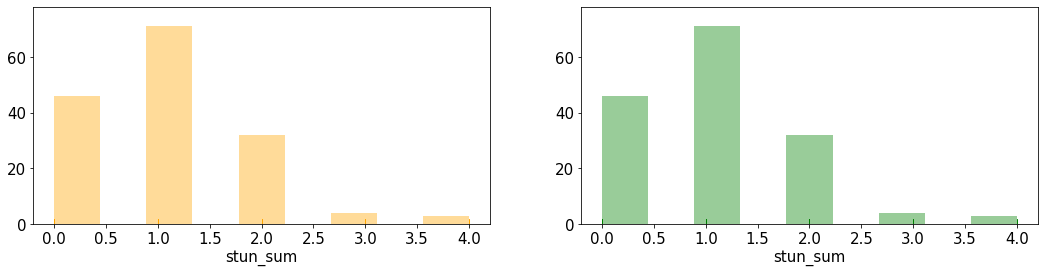

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(stun['stun_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(stun['stun_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

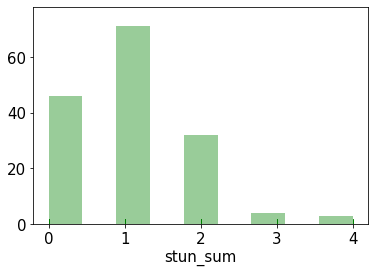

In [ ]:
sns.distplot(stun['stun_sum'], color = 'green', kde = False, rug = True)
plt.show()

In [ ]:
stun[stun['stun_sum']>=3]

,id,stun_skillQ,stun_skillW,stun_skillE,stun_skillR,stun_passive,stun_sum
4,Alistar,1,1,1,0,1,4
23,Draven,1,0,1,1,0,3
73,Maokai,1,1,0,1,0,3
81,Nautilus,1,0,0,1,1,3
104,Sejuani,1,0,1,1,1,4
112,Sion,1,0,1,1,0,3
155,Zyra,0,1,1,1,1,4


## 쉴드 여과

In [ ]:
def find_shield(column):

    shield = []

    for i in range(len(champ_summ)):
        count_shield = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'shield' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        
        elif 'shielding' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)
   


        elif 'shielded' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)
 

        elif 'shields' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        
        elif 'reducing' in champ_summ[column][i]:
            if 'himself' in champ_summ[column][i]:
                count_shield = 1
                shield.append(count_shield)
            elif 'itself' in champ_summ[column][i]:
                count_shield = 1
                shield.append(count_shield)
            elif 'herself' in champ_summ[column][i]:
                count_shield = 1
                shield.append(count_shield)       
            else:
                count_shield = 0
                shield.append(count_shield)                       
   


        elif 'resist' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)
        elif 'protective' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        elif 'protecting' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield) 

        elif 'barrier' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield) 
 

        elif 'defensive' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        # elif 'armor' in champ_summ[column][i]:
        #     count_shield = 1
        #     shield.append(count_shield)
        

        else:
            shield.append(count_shield)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return shield

In [ ]:
skill_set(find_shield).to_csv("/content/contents/skill_shield.csv")

In [ ]:
shield = skill_set(find_shield)

In [ ]:
skill_tooltip(find_shield)

,id,shield_skillQ_tooltip,shield_skillW_tooltip,shield_skillE_tooltip,shield_skillR_tooltip,shield_sum
0,Aatrox,0,0,0,0,0
1,Ahri,0,0,0,0,0
2,Akali,0,0,0,0,0
3,Akshan,0,0,0,0,0
4,Alistar,0,0,0,0,0
5,Amumu,0,0,0,0,0
6,Anivia,0,0,0,0,0
7,Annie,0,0,1,0,1
8,Aphelios,0,0,0,0,0
9,Ashe,0,0,0,0,0


In [ ]:
shield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              156 non-null    object
 1   shield_skillQ   156 non-null    int64 
 2   shield_skillW   156 non-null    int64 
 3   shield_skillE   156 non-null    int64 
 4   shield_skillR   156 non-null    int64 
 5   shield_passive  156 non-null    int64 
 6   shield_sum      156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [ ]:
shield.describe()

,shield_skillQ,shield_skillW,shield_skillE,shield_skillR,shield_passive,shield_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.038462,0.185897,0.108974,0.083333,0.096154,0.512821
std,0.192927,0.390277,0.312611,0.277276,0.295752,0.686150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


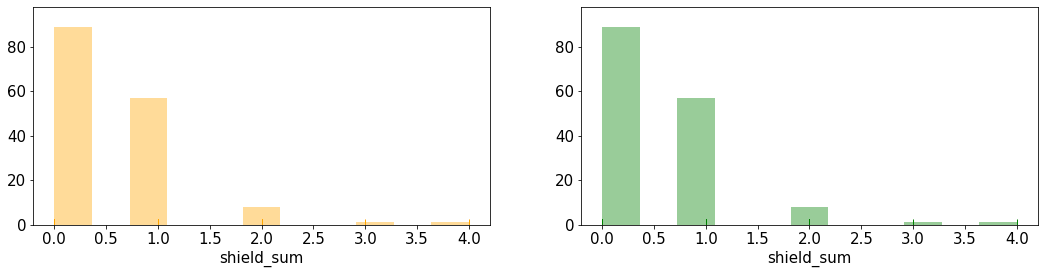

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(shield['shield_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(shield['shield_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

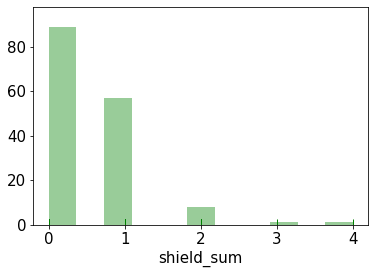

In [ ]:
sns.distplot(shield['shield_sum'],color = 'green', kde = False, rug = True)
plt.show()

In [ ]:
shield[shield['shield_sum']>1]

,id,shield_skillQ,shield_skillW,shield_skillE,shield_skillR,shield_passive,shield_sum
13,Blitzcrank,0,0,0,1,1,2
15,Braum,1,1,1,0,0,3
32,Galio,0,1,0,1,0,2
65,Leona,1,1,0,0,0,2
90,Poppy,0,1,0,0,1,2
94,Rakan,0,0,1,0,1,2
97,Rell,1,1,1,0,1,4
109,Shen,0,0,0,1,1,2
120,TahmKench,0,0,1,1,0,2
153,Zilean,0,1,0,1,0,2


## 슬로우

In [ ]:
def find_slow(column):

    slow = []

    for i in range(len(champ_summ)):
        count_slow = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'slow' in champ_summ[column][i]:
            count_slow = 1
            slow.append(count_slow)




        # elif 'slowed' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)

        # elif 'slows' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)

        # elif 'slowing' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)

        elif 'freezes' in champ_summ[column][i]:
            count_slow = 1
            slow.append(count_slow)

        # elif 'slows' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)
        else:
            slow.append(count_slow)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return slow

In [ ]:
skill_set(find_slow).to_csv("/content/contents/skill_slow.csv")

In [ ]:
slow = skill_set(find_slow)

In [ ]:
slow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            156 non-null    object
 1   slow_skillQ   156 non-null    int64 
 2   slow_skillW   156 non-null    int64 
 3   slow_skillE   156 non-null    int64 
 4   slow_skillR   156 non-null    int64 
 5   slow_passive  156 non-null    int64 
 6   slow_sum      156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [ ]:
slow.describe()

,slow_skillQ,slow_skillW,slow_skillE,slow_skillR,slow_passive,slow_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.185897,0.185897,0.211538,0.198718,0.038462,0.820513
std,0.390277,0.390277,0.409715,0.400320,0.192927,0.807123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


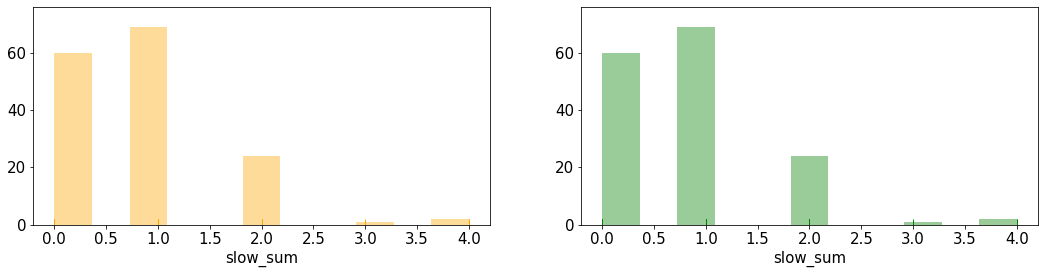

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(slow['slow_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(slow['slow_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

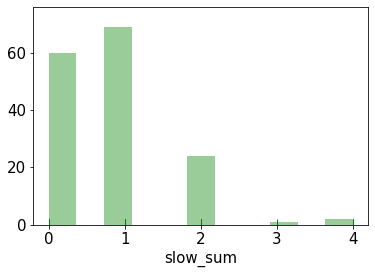

In [ ]:
sns.distplot(slow['slow_sum'], color = 'green', kde = False, rug = True)
plt.show()

In [ ]:
slow[slow['slow_sum']>=2]

,id,slow_skillQ,slow_skillW,slow_skillE,slow_skillR,slow_passive,slow_sum
9,Ashe,0,0,0,1,1,2
12,Bard,1,0,0,0,1,2
15,Braum,1,0,0,1,0,2
18,Cassiopeia,0,1,0,1,0,2
19,Chogath,1,0,1,0,0,2
23,Draven,0,0,1,1,0,2
25,Ekko,1,1,0,0,0,2
30,Fiora,0,1,1,0,0,2
33,Gangplank,0,0,1,1,0,2
35,Gnar,1,0,0,1,0,2


## 생존기? 대쉬 기?

In [ ]:
def find_speed(column):

    speed = []

    for i in range(len(champ_summ)):
        count_speed = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'dashes' in champ_summ[column][i]:
            count_speed = 1
            speed.append(count_speed)




        elif 'dash' in champ_summ[column][i]:
            count_speed = 1
            speed.append(count_speed)

        elif 'faster' in champ_summ[column][i]:
            count_speed = 1
            speed.append(count_speed)

        elif 'fast' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)
        elif 'jump' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)


        elif 'portal' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)
        elif 'blinks' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)
        # elif 'blinks' in champ_summ[column][i]:
        #     count_slow = 1
        #     speed.append(count_speed)

        else:
            speed.append(count_speed)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return speed

In [ ]:
skill_set(find_speed).to_csv("/content/contents/skill_speed.csv")

In [ ]:
speed = skill_set(find_speed)

In [ ]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             156 non-null    object
 1   speed_skillQ   156 non-null    int64 
 2   speed_skillW   156 non-null    int64 
 3   speed_skillE   156 non-null    int64 
 4   speed_skillR   156 non-null    int64 
 5   speed_passive  156 non-null    int64 
 6   speed_sum      156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [ ]:
speed.describe()

,speed_skillQ,speed_skillW,speed_skillE,speed_skillR,speed_passive,speed_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.038462,0.076923,0.134615,0.044872,0.025641,0.320513
std,0.192927,0.267328,0.342412,0.207689,0.158571,0.544618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


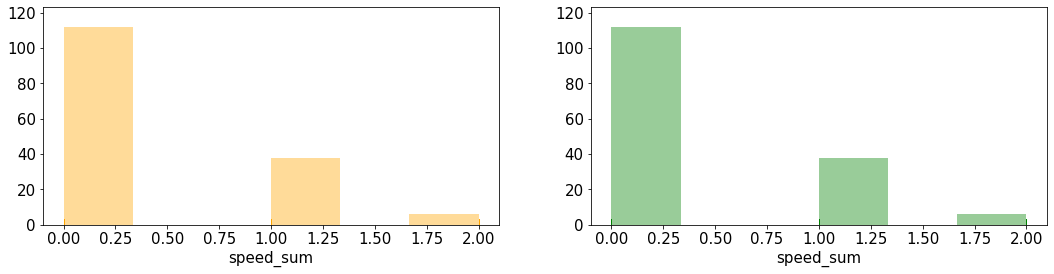

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(speed['speed_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(speed['speed_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

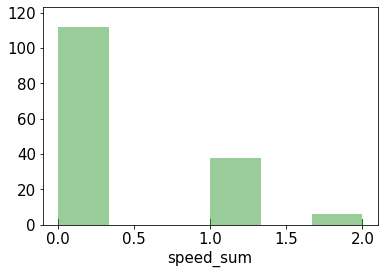

In [ ]:
sns.distplot(speed['speed_sum'], color = 'green', kde = False, rug = True)
plt.show()

In [ ]:
speed[speed['speed_sum']==2]

,id,speed_skillQ,speed_skillW,speed_skillE,speed_skillR,speed_passive,speed_sum
2,Akali,0,0,1,1,0,2
76,MonkeyKing,0,1,1,0,0,2
90,Poppy,0,1,1,0,0,2
92,Qiyana,0,1,1,0,0,2
103,Samira,0,0,1,0,1,2
151,Zed,0,1,0,1,0,2


In [ ]:
champ_summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               156 non-null    object
 1   key              156 non-null    int64 
 2   tags             156 non-null    object
 3   passive          156 non-null    object
 4   skillQ_tooltip   156 non-null    object
 5   skillW_tooltip   156 non-null    object
 6   skillE_tooltip   156 non-null    object
 7   skillR_tooltip   156 non-null    object
 8   skillQ           156 non-null    object
 9   skillW           156 non-null    object
 10  skillE           156 non-null    object
 11  skillR           156 non-null    object
 12  champ_all_skill  156 non-null    object
 13  stun_skillQ      156 non-null    int64 
 14  stun_skillW      156 non-null    int64 
 15  stun_skillE      156 non-null    int64 
 16  stun_skillR      156 non-null    int64 
 17  stun_passive     156 non-null    in

## 물리뎀

In [ ]:
def skill_tool(find):
    skill_setting = ['skillQ','skillW','skillE','skillR']
    find_list = {find_stun : 'stun',find_speed:'speed',find_slow:'slow',find_shield:'shield',find_physical:'physical',find_magic:'magic'}
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = find_list[find]+'_' +skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found

    sum_name = find_list[find] + '_' + 'sum'
    skill_find[sum_name] = skill_find[find_list[find]+'_' +'skillQ'] + skill_find[find_list[find]+'_' +'skillW'] + skill_find[find_list[find]+'_' +'skillE'] + skill_find[find_list[find]+'_' +'skillR']
    return skill_find

In [ ]:
def find_physical(column):

    physical = []

    for i in range(len(champ_info)):
        count_physical = 0
        champ_info[column][i]['tooltip'] = champ_info[column][i]['tooltip'].lower()


        if 'physical' in champ_info[column][i]['tooltip']:
            count_physical = 1
            physical.append(count_physical)

        elif 'basic' in champ_info[column][i]['tooltip']:
            if 'attack' in champ_info[column][i]['tooltip']:
                count_physical = 1
                physical.append(count_physical)
            else:
                count_physical = 0
                physical.append(count_physical)


        elif 'physical' in champ_info[column][i]['tooltip']:
            count_physical = 1
            physical.append(count_physical)


        elif 'attack' in champ_info[column][i]['tooltip']:
            if 'magic' in  champ_info[column][i]['tooltip']:
                count_physical = 0
                physical.append(count_physical)
            else:
                count_physical = 1
                physical.append(count_physical)

        elif 'physical damage' in champ_info[column][i]['tooltip']:
            count_physical = 1
            physical.append(count_physical)


        else:
            physical.append(count_physical)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return physical

In [ ]:
champ_summ['skillQ'][98]

'renekton swings his blade, dealing moderate physical damage to all targets around him, and heals for a small portion of the damage dealt. if he has more than 50 fury, his damage and heal are increased.'

In [ ]:
skill_tool(find_physical).to_csv("/content/contents/skill_physical.csv")

In [ ]:
physical = skill_tool(find_physical)

In [ ]:
physical

,id,physical_skillQ,physical_skillW,physical_skillE,physical_skillR,physical_sum
0,Aatrox,1,1,0,1,3
1,Ahri,0,0,0,0,0
2,Akali,0,0,0,0,0
3,Akshan,1,0,1,1,3
4,Alistar,0,0,0,0,0
5,Amumu,0,0,1,0,1
6,Anivia,0,0,0,0,0
7,Annie,0,0,0,0,0
8,Aphelios,0,0,0,1,1
9,Ashe,1,1,0,0,2


In [ ]:
physical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               156 non-null    object
 1   physical_skillQ  156 non-null    int64 
 2   physical_skillW  156 non-null    int64 
 3   physical_skillE  156 non-null    int64 
 4   physical_skillR  156 non-null    int64 
 5   physical_sum     156 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.4+ KB


In [ ]:
physical.describe()

,physical_skillQ,physical_skillW,physical_skillE,physical_skillR,physical_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.474359,0.307692,0.307692,0.326923,1.416667
std,0.500950,0.463025,0.463025,0.470600,1.395654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000


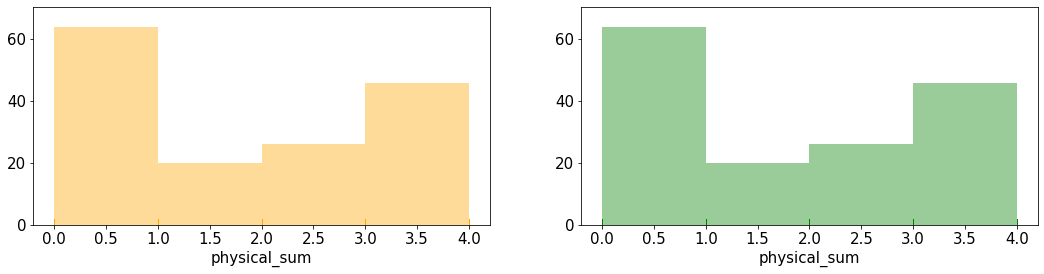

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(physical['physical_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(physical['physical_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

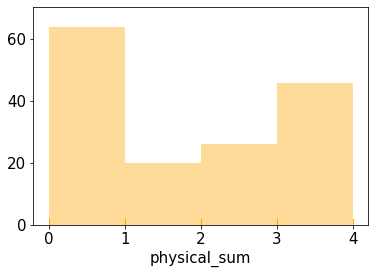

In [ ]:
sns.distplot(physical['physical_sum'], color = 'orange', kde = False, rug = True)
plt.show()

In [ ]:
physical[physical['physical_sum']>=3]

,id,physical_skillQ,physical_skillW,physical_skillE,physical_skillR,physical_sum
0,Aatrox,1,1,0,1,3
3,Akshan,1,0,1,1,3
17,Camille,1,1,1,0,3
23,Draven,1,1,1,1,4
35,Gnar,1,0,1,1,3
37,Graves,1,0,1,1,3
41,Illaoi,1,1,0,1,3
48,Jhin,1,1,0,1,3
49,Jinx,1,1,0,1,3
51,Kalista,1,0,1,1,3


In [ ]:
physical[physical['physical_sum']==2]

,id,physical_skillQ,physical_skillW,physical_skillE,physical_skillR,physical_sum
9,Ashe,1,1,0,0,2
13,Blitzcrank,0,1,1,0,2
16,Caitlyn,1,0,0,1,2
21,Darius,1,1,0,0,2
24,DrMundo,0,0,1,1,2
30,Fiora,1,0,1,0,2
33,Gangplank,1,0,1,0,2
34,Garen,1,0,1,0,2
39,Hecarim,1,0,1,0,2
42,Irelia,1,1,0,0,2


## 마법!

In [ ]:
def find_magic(column):

    magic = []

    for i in range(len(champ_info)):
        count_magic = 0
        champ_info[column][i]['tooltip'] = champ_info[column][i]['tooltip'].lower()

        if 'magic' in champ_info[column][i]['tooltip']:
            count_magic = 1
            magic.append(count_magic)




        elif 'magical' in champ_info[column][i]['tooltip']:
            count_magic = 1
            magic.append(count_magic)

        # elif 'total' in champ_info[column][i]['tooltip']:
        #     count_magic = 1
        #     magic.append(count_magic)



        else:
            magic.append(count_magic)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return magic

In [ ]:
skill_tool(find_magic).to_csv("/content/contents/skill_magic.csv")

In [ ]:
magic = skill_tool(find_magic)

In [ ]:
magic

,id,magic_skillQ,magic_skillW,magic_skillE,magic_skillR,magic_sum
0,Aatrox,0,0,0,0,0
1,Ahri,1,1,1,1,4
2,Akali,1,0,1,1,3
3,Akshan,0,0,0,0,0
4,Alistar,1,1,1,0,3
5,Amumu,1,1,1,1,4
6,Anivia,1,0,1,1,3
7,Annie,1,1,1,1,4
8,Aphelios,0,0,0,0,0
9,Ashe,0,0,0,1,1


In [ ]:
magic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            156 non-null    object
 1   magic_skillQ  156 non-null    int64 
 2   magic_skillW  156 non-null    int64 
 3   magic_skillE  156 non-null    int64 
 4   magic_skillR  156 non-null    int64 
 5   magic_sum     156 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.4+ KB


In [ ]:
magic.describe()

,magic_skillQ,magic_skillW,magic_skillE,magic_skillR,magic_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.532051,0.532051,0.576923,0.576923,2.217949
std,0.500579,0.500579,0.495639,0.495639,1.433673
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000


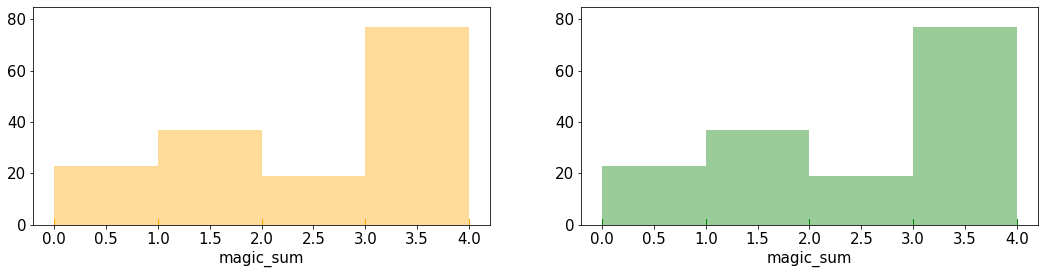

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(magic['magic_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(magic['magic_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

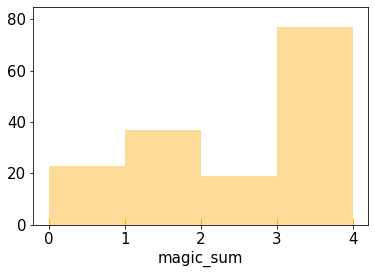

In [ ]:
sns.distplot(magic['magic_sum'],  color = 'orange', kde = False, rug = True)
plt.show()

In [ ]:
magic[magic['magic_sum']==2]

,id,magic_skillQ,magic_skillW,magic_skillE,magic_skillR,magic_sum
10,AurelionSol,1,0,0,1,2
12,Bard,1,0,0,1,2
13,Blitzcrank,1,0,0,1,2
24,DrMundo,1,1,0,0,2
26,Elise,1,1,0,0,2
39,Hecarim,0,1,0,1,2
46,Jax,0,1,0,1,2
69,Lulu,1,0,1,0,2
77,Mordekaiser,1,0,1,0,2
80,Nasus,0,0,1,1,2


## 합치기

In [ ]:
# 스킬 종류 - 상대방 제어기, 딜 , 방어력 올리기, 버프 스킬- 힐, 아군 도움 주기

In [ ]:
# all_data = [stun, shield, slow, speed, physical, magic]
# for i in all_data:
#     pd.marge()

In [ ]:
pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(stun, shield),slow),speed),physical),magic).to_csv("/content/contents/champ_skill_all.csv")

In [ ]:
all_info = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(stun, shield),slow),speed),physical),magic)

In [ ]:
all_info

,id,stun_skillQ,stun_skillW,stun_skillE,stun_skillR,stun_passive,stun_sum,shield_skillQ,shield_skillW,shield_skillE,shield_skillR,shield_passive,shield_sum,slow_skillQ,slow_skillW,slow_skillE,slow_skillR,slow_passive,slow_sum,speed_skillQ,speed_skillW,speed_skillE,speed_skillR,speed_passive,speed_sum,physical_skillQ,physical_skillW,physical_skillE,physical_skillR,physical_sum,magic_skillQ,magic_skillW,magic_skillE,magic_skillR,magic_sum
0,Aatrox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,3,0,0,0,0,0
1,Ahri,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,4
2,Akali,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,2,0,0,0,0,0,1,0,1,1,3
3,Akshan,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,3,0,0,0,0,0
4,Alistar,1,1,1,0,1,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,3
5,Amumu,1,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,4
6,Anivia,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,3
7,Annie,1,0,0,0,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,4
8,Aphelios,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,Ashe,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,1,1,0,0,2,0,0,0,1,1


In [ ]:
ad_champ = []
ap_champ = []
hybrid_champ = []
which_champ = []
for i in range(len(all_info)):
    which = 'hybrid_champ'
    if all_info['physical_sum'][i] > all_info['magic_sum'][i]:
        ad_champ.append(all_info['id'][i])
        which = 'ad_champ'
        which_champ.append(which)
    elif all_info['physical_sum'][i] < all_info['magic_sum'][i]:
        ap_champ.append(all_info['id'][i])
        which = 'ap_champ'
        which_champ.append(which)
    else:

        which_champ.append(which)
        hybrid_champ.append(all_info['id'][i])

In [ ]:
all_info['which_champ'] = which_champ

In [ ]:
ad_champ

['Aatrox',
 'Akshan',
 'Aphelios',
 'Ashe',
 'Caitlyn',
 'Camille',
 'Darius',
 'Draven',
 'Fiora',
 'Gangplank',
 'Garen',
 'Gnar',
 'Graves',
 'Illaoi',
 'JarvanIV',
 'Jhin',
 'Jinx',
 'Kaisa',
 'Kalista',
 'Kayn',
 'Khazix',
 'Kindred',
 'Kled',
 'LeeSin',
 'Lucian',
 'MasterYi',
 'MissFortune',
 'MonkeyKing',
 'Nocturne',
 'Olaf',
 'Pantheon',
 'Poppy',
 'Pyke',
 'Qiyana',
 'Quinn',
 'RekSai',
 'Renekton',
 'Rengar',
 'Riven',
 'Samira',
 'Senna',
 'Sett',
 'Shen',
 'Sivir',
 'Talon',
 'Trundle',
 'Tryndamere',
 'Twitch',
 'Udyr',
 'Urgot',
 'Varus',
 'Vayne',
 'Vi',
 'Viego',
 'Volibear',
 'Xayah',
 'XinZhao',
 'Yasuo',
 'Yone',
 'Zed']

In [ ]:
ap_champ 
# (챔피언(ad,ap) + 아이템(ad,ap) = 챔피언 (신화템2가지))

['Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'AurelionSol',
 'Azir',
 'Bard',
 'Brand',
 'Braum',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Diana',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fizz',
 'Galio',
 'Gragas',
 'Gwen',
 'Heimerdinger',
 'Irelia',
 'Ivern',
 'Janna',
 'Jayce',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kennen',
 'KogMaw',
 'Leblanc',
 'Leona',
 'Lillia',
 'Lissandra',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nautilus',
 'Neeko',
 'Nunu',
 'Orianna',
 'Rakan',
 'Rammus',
 'Rell',
 'Rumble',
 'Ryze',
 'Sejuani',
 'Seraphine',
 'Shaco',
 'Shyvana',
 'Singed',
 'Sona',
 'Soraka',
 'Swain',
 'Sylas',
 'Syndra',
 'TahmKench',
 'Taliyah',
 'Teemo',
 'Thresh',
 'Tristana',
 'TwistedFate',
 'Veigar',
 'Velkoz',
 'Viktor',
 'Vladimir',
 'Warwick',
 'Xerath',
 'Yuumi',
 'Zac',
 'Ziggs',
 'Zilean',
 'Zoe',
 'Zyra']

In [ ]:
champ_info[champ_info['id']=='Irelia']

,Unnamed: 0,version,id,key,name,title,blurb,info,image,tags,partype,stats,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,skins,lore,allytips,enemytips,spells,passive,recommended,skillQ,skillW,skillE,skillR
42,42,11.17.1,Irelia,39,Irelia,the Blade Dancer,The Noxian occupation of Ionia produced many h...,"{'attack': 7, 'defense': 4, 'magic': 5, 'diffi...","{'full': 'Irelia.png', 'sprite': 'champion1.pn...","['Fighter', 'Assassin']",Mana,"{'hp': 520, 'hpperlevel': 110, 'mp': 350, 'mpp...",7,4,5,5,520.0,110,350.0,50.0,335,36,3.0,28.0,1.25,200,8.5,0.85,8.0,0.8,0,0,65.0,4.0,2.5,0.656,"[{'id': '39000', 'num': 0, 'name': 'default', ...",The Noxian occupation of Ionia produced many h...,['Use Bladesurge to cover great distances by t...,['Pay attention to Ionian Fervor stacks and tr...,"[{'id': 'IreliaQ', 'name': 'Bladesurge', 'desc...","{'name': 'Ionian Fervor', 'description': 'When...",[],"{'id': 'IreliaQ', 'name': 'Bladesurge', 'descr...","{'id': 'IreliaW', 'name': 'Defiant Dance', 'de...","{'id': 'IreliaE', 'name': 'Flawless Duet', 'de...","{'id': 'IreliaR', 'name': 'Vanguard's Edge', '..."


In [ ]:
champ_info['skillR'][42]

{'cooldown': [140, 120, 100],
 'cooldownBurn': '140/120/100',
 'cost': [100, 100, 100],
 'costBurn': '100',
 'costType': ' {{ abilityresourcename }}',
 'datavalues': {},
 'description': 'Irelia fires a massive number of blades that explode outward upon hitting an enemy champion. Enemies hit by the blades are damaged and Marked. Afterwards the blades form a wall that will damage and slow enemies that walk through it.',
 'effect': [None,
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0],
  [0, 0, 0]],
 'effectBurn': [None, '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 'id': 'IreliaR',
 'image': {'full': 'IreliaR.png',
  'group': 'spell',
  'h': 48,
  'sprite': 'spell4.png',
  'w': 48,
  'x': 288,
  'y': 96},
 'leveltip': {'effect': ['{{ basemissiledamage }} -> {{ basemissiledamageNL }}',
   '{{ basezonedamage }} -> {{ basezonedamageNL }}',
   '{{ cooldown }} -> {{ cooldownNL }}',
   '{{ cooldownamount }} -> {{ cooldo

In [ ]:
hybrid_champ

['Blitzcrank',
 'DrMundo',
 'Hecarim',
 'Jax',
 'Nasus',
 'Nidalee',
 'Ornn',
 'Sion',
 'Skarner',
 'Taric',
 'Yorick']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               156 non-null    object
 1   stun_skillQ      156 non-null    int64 
 2   stun_skillW      156 non-null    int64 
 3   stun_skillE      156 non-null    int64 
 4   stun_skillR      156 non-null    int64 
 5   stun_passive     156 non-null    int64 
 6   stun_sum         156 non-null    int64 
 7   shield_skillQ    156 non-null    int64 
 8   shield_skillW    156 non-null    int64 
 9   shield_skillE    156 non-null    int64 
 10  shield_skillR    156 non-null    int64 
 11  shield_passive   156 non-null    int64 
 12  shield_sum       156 non-null    int64 
 13  slow_skillQ      156 non-null    int64 
 14  slow_skillW      156 non-null    int64 
 15  slow_skillE      156 non-null    int64 
 16  slow_skillR      156 non-null    int64 
 17  slow_passive     156 non-null    in

In [ ]:
all_info['which_champ'].count()

156

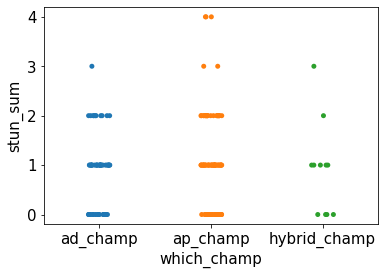

In [ ]:
sns.stripplot(x='which_champ', y='stun_sum', data=all_info)

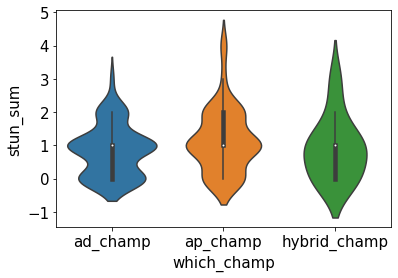

In [ ]:
sns.violinplot(x='which_champ', y='stun_sum', data=all_info)

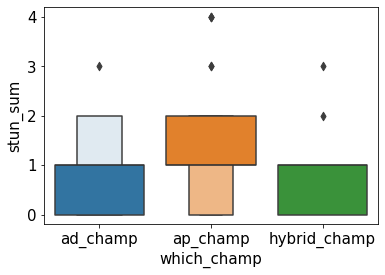

In [ ]:
sns.boxenplot(x='which_champ', y='stun_sum', data=all_info)

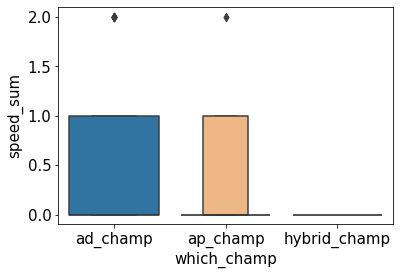

In [ ]:
sns.boxenplot(x='which_champ', y='speed_sum', data=all_info)

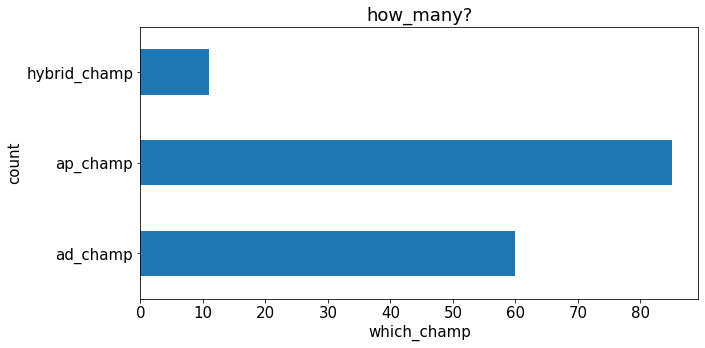

In [ ]:
# 시간대 순(x축에 따라) 으로 정렬
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
all_info['which_champ'].value_counts().sort_index(ascending=True).plot(kind='barh')
plt.xlabel('which_champ')
plt.ylabel('count')
plt.title('how_many?')
plt.show() # 캔버스를 보여준다

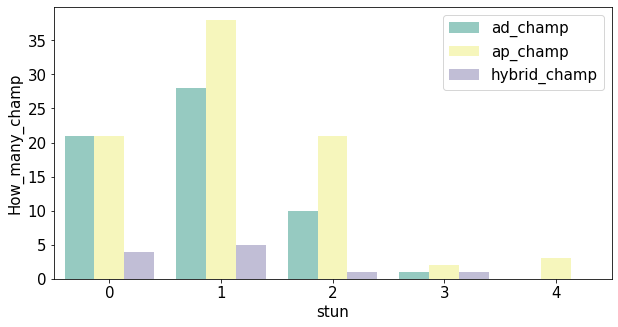

In [ ]:
# 스턴을 가진 수에 챔피언 종류 분포
plt.figure(figsize=(10,5))
cnt=sns.countplot(x='stun_sum',hue='which_champ',data=all_info,palette='Set3')
cnt.set_xlabel("stun")
cnt.set_ylabel("How_many_champ")
plt.legend(loc='upper right')
plt.show()

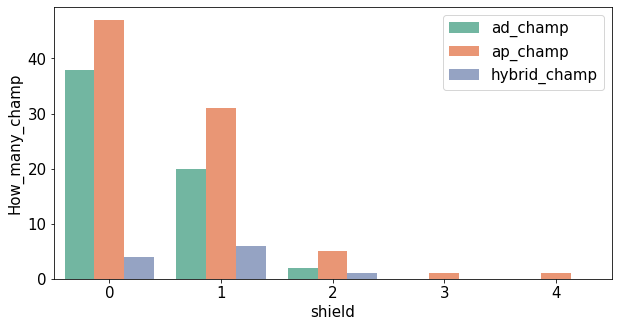

In [ ]:
# 쉴드를 가진 수에 챔피언 종류 분포
plt.figure(figsize=(10,5))
cnt=sns.countplot(x='shield_sum',hue='which_champ',data=all_info,palette='Set2')
cnt.set_xlabel("shield")
cnt.set_ylabel("How_many_champ")
plt.legend(loc='upper right')
plt.show()

In [ ]:
all_info['which_champ'].unique()

array(['ad_champ', 'ap_champ', 'hybrid_champ'], dtype=object)

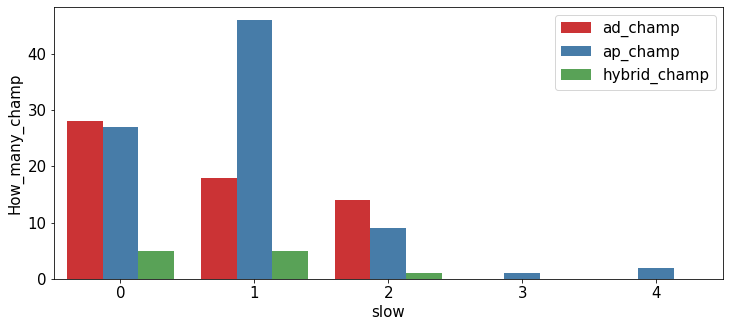

In [ ]:
# 슬로우를 가진 수에 챔피언 종류 분포
plt.figure(figsize=(12,5))
cnt=sns.countplot(x='slow_sum',hue='which_champ',data=all_info,palette='Set1')
cnt.set_xlabel("slow")
cnt.set_ylabel("How_many_champ")
plt.legend(loc='upper right',labels=all_info['which_champ'].unique())
plt.show()

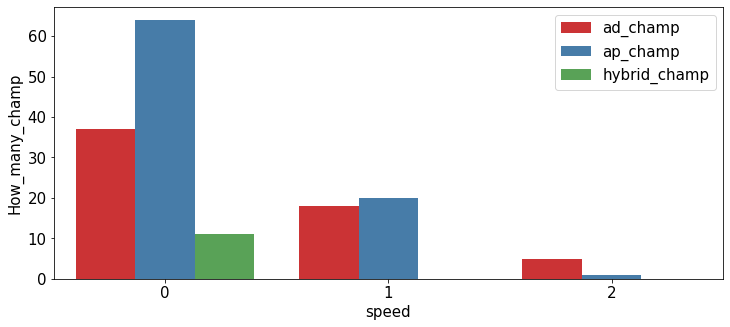

In [ ]:
plt.figure(figsize=(12,5))
cnt=sns.countplot(x='speed_sum',
                  hue='which_champ',
                  data=all_info,palette='Set1')
cnt.set_xlabel("speed")
cnt.set_ylabel("How_many_champ")
plt.legend(loc='upper right')
plt.show()

<Figure size 1296x288 with 0 Axes>

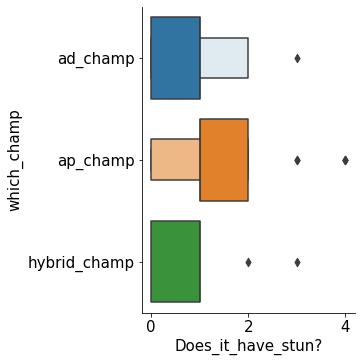

In [ ]:
plt.figure(figsize = (18, 4))
p = sns.catplot(x='stun_sum',y='which_champ', kind='boxen',data=all_info)
p.set(xlabel='Does_it_have_stun?', ylabel='which_champ')
plt.show()

<Figure size 1296x288 with 0 Axes>

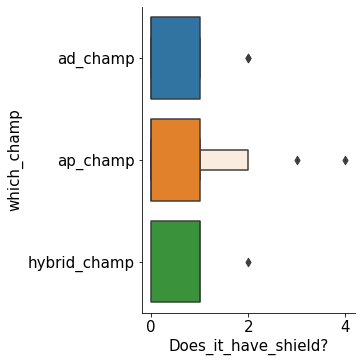

In [ ]:
plt.figure(figsize = (18, 4))
p = sns.catplot(x='shield_sum',y='which_champ', kind='boxen',data=all_info)
p.set(xlabel='Does_it_have_shield?', ylabel='which_champ')
plt.show()

<Figure size 1296x288 with 0 Axes>

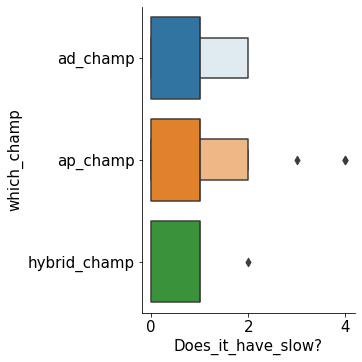

In [ ]:
plt.figure(figsize = (18, 4))
p = sns.catplot(x='slow_sum',y='which_champ', kind='boxen',data=all_info)
p.set(xlabel='Does_it_have_slow?', ylabel='which_champ')
plt.show()

<Figure size 1296x288 with 0 Axes>

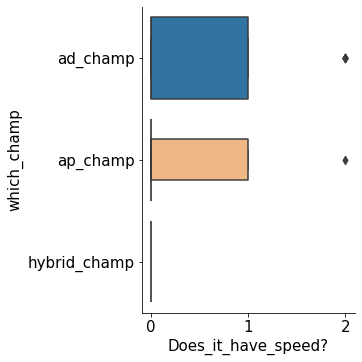

In [ ]:
plt.figure(figsize = (18, 4))
p = sns.catplot(x='speed_sum',y='which_champ', kind='boxen',data=all_info)
p.set(xlabel='Does_it_have_speed?', ylabel='which_champ')
plt.show()

In [ ]:
all_info['which_champ'].unique()

array(['ad_champ', 'ap_champ', 'hybrid_champ'], dtype=object)

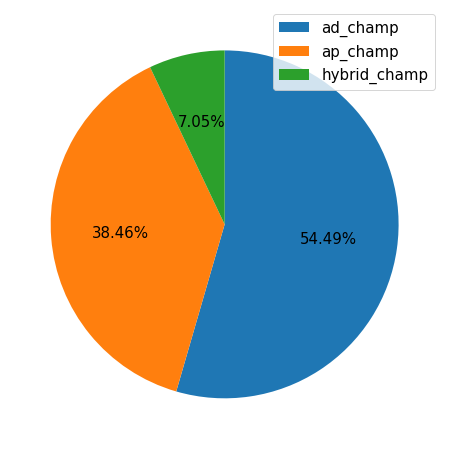

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(all_info['which_champ'].value_counts(), ## 파이차트 출력
        # labels=all_info['which_champ'].unique(), ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력
       )
 
plt.legend(pie[0],all_info['which_champ'].unique()) ## 범례 표시
plt.show()